# Обробка зображень та виявлення автомобілів

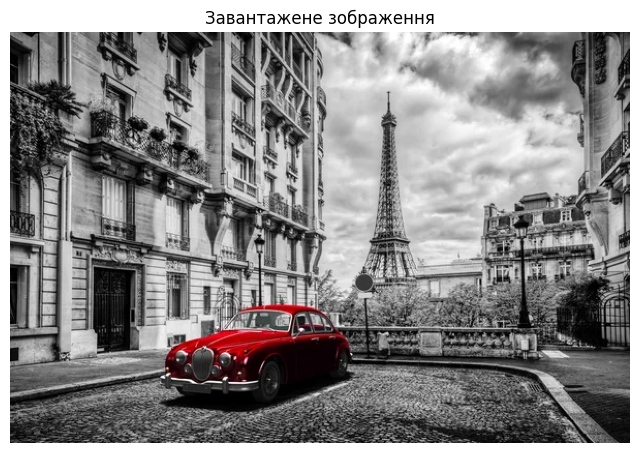

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Завантаження зображення з файлу
image_path = 'photo-car.jpg'
image = cv2.imread(image_path)

# Перевірка, чи зображення завантажено успішно
if image is None:
    print("Помилка: Не вдалося завантажити зображення. Перевірте шлях до файлу.")
    exit(1)

# Відображення за допомогою matplotlib (конвертуємо з BGR в RGB)
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Завантажене зображення")
plt.axis('off')
plt.show()

## Обробка зображення

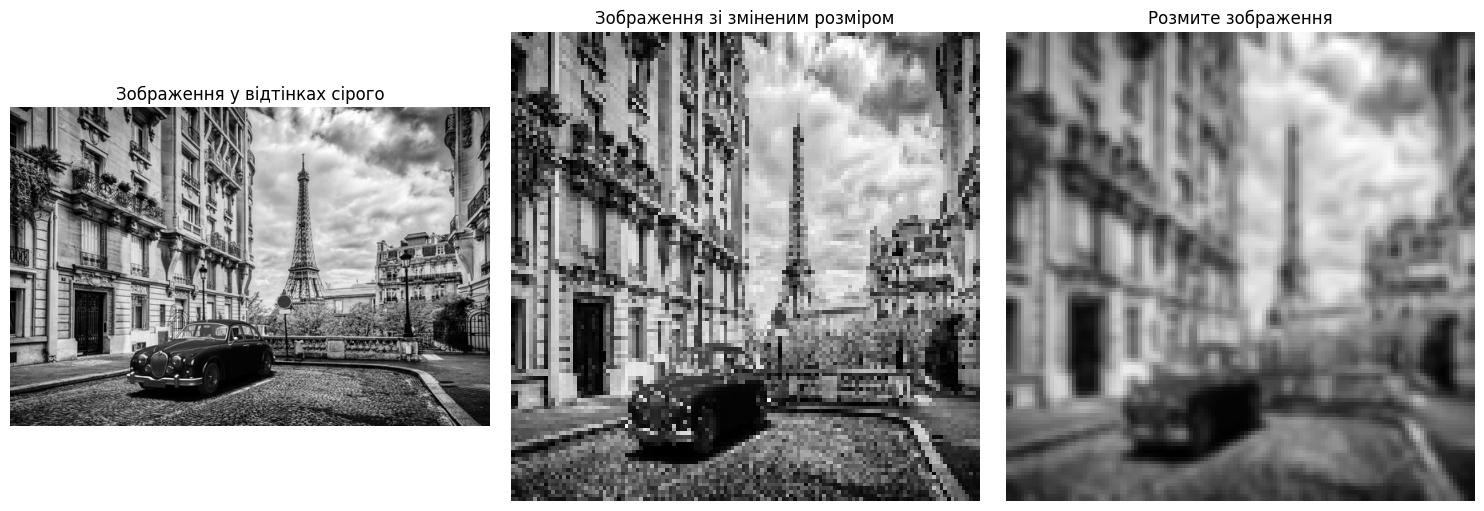

In [2]:
# Перетворення у відтінки сірого
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Зміна розміру
resized = cv2.resize(gray, (128, 128))

# Застосування розмиття (Gaussian Blur)
blurred = cv2.GaussianBlur(resized, (5, 5), 0)

# Відображення результатів за допомогою matplotlib
plt.figure(figsize=(15, 5))

# Створюємо підграфіки для трьох зображень
plt.subplot(1, 3, 1)
plt.imshow(gray, cmap='gray')
plt.title('Зображення у відтінках сірого')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(resized, cmap='gray')
plt.title('Зображення зі зміненим розміром')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(blurred, cmap='gray')
plt.title('Розмите зображення')
plt.axis('off')

plt.tight_layout()
plt.show()

## Виявлення країв

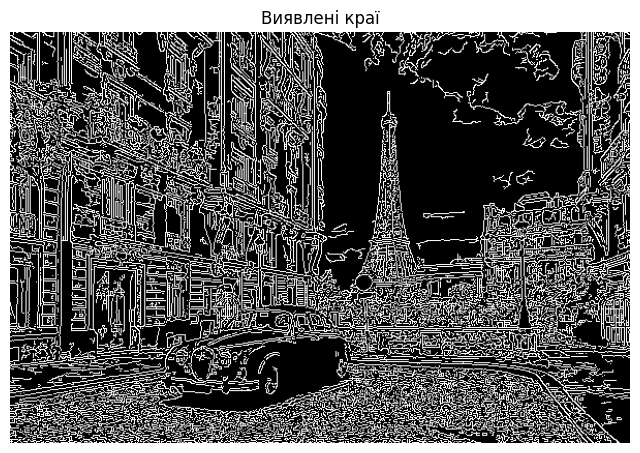

In [3]:
# Виявлення країв за допомогою Canny
edges = cv2.Canny(gray, 50, 150)

# Відображення результату за допомогою matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(edges, cmap='gray')
plt.title("Виявлені краї")
plt.axis('off')
plt.show()

## Виявлення автомобілів

In [8]:
import cv2

# Завантаження каскадного класифікатора для виявлення автомобілів
# Переконайся, що шлях до файлу є правильним.
# cv2.data.haarcascades зазвичай вказує на встановлені каскади OpenCV.
car_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_cars.xml")

# Перевір, чи класифікатор був успішно завантажений
if car_cascade.empty():
    print("Помилка: Не вдалося завантажити файл каскаду для автомобілів.")
else:
    # Завантаження зображення
    image = cv2.imread('photo-car.jpg') # Заміни 'your_image.jpg' на шлях до твого зображення

    # Перетворення зображення у відтінки сірого для кращого виявлення
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Виявлення автомобілів на зображенні
    # scaleFactor: Параметр, що визначає, наскільки зменшується розмір зображення на кожному кроці.
    # minNeighbors: Параметр, що визначає, скільки сусідніх прямокутників-кандидатів потрібно, щоб вважати об'єкт виявленим.
    # minSize: Мінімальний розмір об'єкта. Об'єкти меншого розміру ігноруються.
    cars = car_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4, minSize=(80, 80))

    # Нанесення рамок на виявлені автомобілі
    image_with_cars = image.copy() # Створюємо копію, щоб не змінювати оригінал
    for (x, y, w, h) in cars:
        cv2.rectangle(image_with_cars, (x, y), (x + w, y + h), (0, 255, 0), 2) # Колір рамки - зелений, товщина - 2 пікселі

    # Відображення зображення з виділеними автомобілями
    cv2.imshow('Detected Cars', image_with_cars)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


Помилка: Не вдалося завантажити файл каскаду для автомобілів.
